This first attempt is the implementation of deep Q learning to control 1 misconfiguration inverter. <br/>
Feeder: feeder13_U_R_Pecan_Solar, has one inverter.


In [46]:

from DSSStartup import DSSStartup
from setInfo import *
from getInfo import *
import matplotlib.pyplot as plt
import numpy as np

result= DSSStartup()
DSSText=result['dsstext']
DSSSolution=result['dsssolution']
DSSCircuit=result['dsscircuit']
DSSObj=result['dssobj']

DSSText.command = 'Compile C:/feeders/feeder13_U_R_Pecan_Solar/feeder13_U_R_Pecan_Solar.dss'
# This is a quick way to change properties of a specific group of device, here the regulator and cap controls are enabled
setRegInfo(DSSObj,list(DSSCircuit.RegControls.AllNames),'enabled',[1]* len(DSSCircuit.RegControls.AllNames))
setCapControlInfo(DSSObj,list(DSSCircuit.CapControls.AllNames),'enabled',[1]*len(DSSCircuit.CapControls.AllNames))


DSSSolution.Mode=1 # 1 represents daily mode, 2 represents yearly mode
DSSSolution.Number=1440 # Solutions Per Solve Command
DSSSolution.StepSize=1 # Stepsize= 1s
DSSSolution.MaxControlIterations=1000 #Increase the number of maximum control iterations to make sure the system can solve the power flow
DSSSolution.MaxIterations=100 #Increasing the number of power flow iterations to achieve convergence

DSSText.Command='Set ControlMode=Time' # Refer to OpenDSS documentation
DSSSolution.Solve()

Monitor Name: meter_632_power


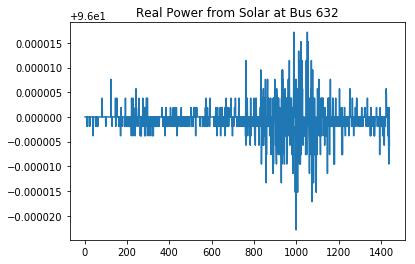

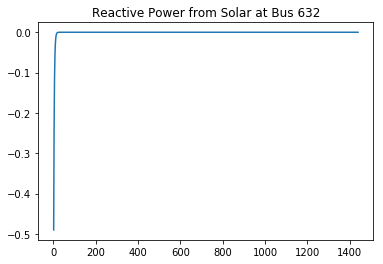

{'name': 'vv_curve_deadband', 'npts': 6, 'xarray': array([0.5, 0.6, 0.7, 1.3, 1.4, 1.5]), 'yarray': array([ 1.,  1.,  0.,  0., -1., -1.])}


In [47]:
DSSMon=DSSCircuit.Monitors
DSSMon.Name='Meter_632_power'
print('Monitor Name: ' + DSSMon.Name )

#print(DSSMon.dblHour)
time=3600*np.asarray((DSSMon.dblHour))
Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

# Generation is negative in OpenDSS hence, multiply by -1
plt.figure()
plt.plot(time,-Real_power)
plt.title('Real Power from Solar at Bus 632')
plt.show()

plt.figure()
plt.plot(time,-Reactive_power)
plt.title('Reactive Power from Solar at Bus 632')
plt.show()

#DSSMon=DSSCircuit.Monitors
#DSSMon.Name='Meter_692_power'

#Real_power=np.asarray(DSSMon.Channel(1))+np.asarray(DSSMon.Channel(3))+np.asarray(DSSMon.Channel(5))
#Reactive_power=np.asarray(DSSMon.Channel(2))+np.asarray(DSSMon.Channel(4))+np.asarray(DSSMon.Channel(6))

#plt.figure()
#plt.plot(time,-Real_power)
#plt.title('Real Power from Solar at Bus 692')
#plt.show()

#plt.figure()
#plt.plot(time,-Reactive_power)
#plt.title('Reactive Power from Solar at Bus 692')
#plt.show()


# Getting a specific xycurve
xycurves=getXYCurveInfo(DSSObj,['vv_curve_deadband'])
# because it returns a list
vw_curve=xycurves[0]
# print to console
print(vw_curve)
# Change one parameter of the curve
#vw_curve['xarray']=np.asarray([1,1,1,1])
# making sure that the change happened
#print(vw_curve)
# set the curveinformation
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

# make sure that the change happened
#xycurves=getXYCurveInfo(DSSObj,['vw_curve'])
#vw_curve=xycurves[0]
#print(vw_curve)

# Error Checking, this will generate an error as npts do not match the length of the xarray
#vw_curve['xarray']=np.asarray([1,1,1,1,1])
#setXYCurveInfo(DSSObj,['vw_curve'],[vw_curve])

(' V1', ' VAngle1', ' V2', ' VAngle2', ' V3', ' VAngle3', ' I1', ' IAngle1', ' I2', ' IAngle2', ' I3', ' IAngle3\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00')


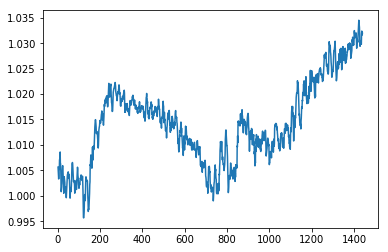

In [48]:
DSSMon.Name='Meter_632_voltage'
# just printing the meter headers
print(DSSMon.header)
# Unfortunately the channel does not have the time information (still under investigation)
time=3600*np.asarray(list(DSSMon.dblHour)) # Multiplying by 3600 converts it to seconds
# Reading the Voltage
Voltage_Phasea=np.asarray(DSSMon.Channel(1))
Voltage_Phaseb=np.asarray(DSSMon.Channel(3))
Voltage_Phasec=np.asarray(DSSMon.Channel(5))
Voltage=Voltage_Phasea +Voltage_Phaseb+Voltage_Phasec
# dividing by the base and also taking average
plt.plot(time,Voltage/(3*2400))
plt.show()